In [1]:
! pip install climetlab_s2s_ai_competition climetlab --quiet

In [1]:
import climetlab as cml 

module 'Magics' has no attribute 'strict_mode'


In [2]:
import climetlab_s2s_ai_competition
print(f'Climetlab version : {cml.__version__}')
print(f'Climetlab-s2s-ai-competition plugin version : {climetlab_s2s_ai_competition.__version__}')

Climetlab version : 0.2.1
Climetlab-s2s-ai-competition plugin version : 0.2.1


# Using Netcdf data

## Version 0.1.7 : with coordinates (forecast_time,step) + time as another field.

In [3]:
version = '0.1.7'

Let us download netcdf file for total precipitation (tp) for one date :

In [5]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set",
                         date=["20200102"],
                         parameter='tp',
                         version=version,
                         format='netcdf')

By downloading data from this dataset, you agree to the their terms: Attribution 4.0 International(CC BY 4.0). If you do not agree with such terms, do not download the data. For more information, please visit https://www.ecmwf.int/en/terms-use and https://apps.ecmwf.int/datasets/data/s2s/licence/.


This climetlab dataset can be used as a xarray.Dataset or as a pandas.DataFrame :

In [6]:
cmlds.to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

In [7]:
# cmlds.to_pandas() # TODO : implement to_pandas()

We can get the temperature parameter (2t) in a similar fashion. The "date" and "parameter" arguments also accept lists of values.

In [8]:
cml.load_dataset("s2s-ai-competition-reference-set", date="20200102", parameter='2t', version=version, format='netcdf').to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, step: 46)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * step           (step) timedelta64[ns] 1 days 2 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] ...
    t2m            (realization, forecast_time, step, latitude, longitude) float32 ...

In [9]:
cml.load_dataset("s2s-ai-competition-reference-set", date="20200102", parameter=['2t','tp'], version=version, format='netcdf').to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] 2020-01-02 ... 2020-0...
    t2m            (realization, forecast_time, step, latitude, longitude) float32 ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

In [10]:
cml.load_dataset("s2s-ai-competition-reference-set", date=["20200102", "20200109"], parameter=['2t','tp'], version=version, format='netcdf').to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 2, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 2020-01-09
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] 2020-01-02 ... 2020-0...
    t2m            (realization, forecast_time, step, latitude, longitude) float32 ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

In [11]:
# TODO
#from datetime import datetime
#cml.load_dataset("s2s-ai-competition-reference-set", date=[datetime(2020,1,2), "2020-01-09"], parameter=['2t','tp'], version=version, format='netcdf').to_xarray()

In [12]:
# TODO
#import pandas as pd
#cml.load_dataset("s2s-ai-competition-reference-set", date=pd.date_range(start="2020-01-02", end="2020-01-31", freq="w-thu"), parameter='2t', version=version, format='netcdf').to_xarray()

Hindcast data is available by adding the appropriate parameter : hindcast = True

In [13]:
ds = cml.load_dataset("s2s-ai-competition-reference-set", hindcast=True, date="20200102", parameter=['2t','tp'], version=version, format='netcdf').to_xarray()

### Computing average and plotting

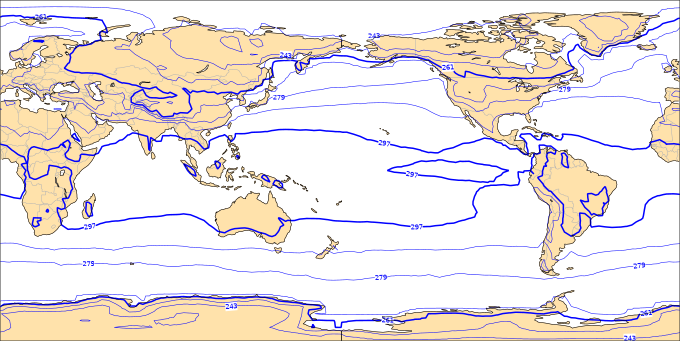

In [14]:
mean1 = ds.mean(dim="step")
cml.plot_map(mean1.isel(forecast_time=0, realization=0))


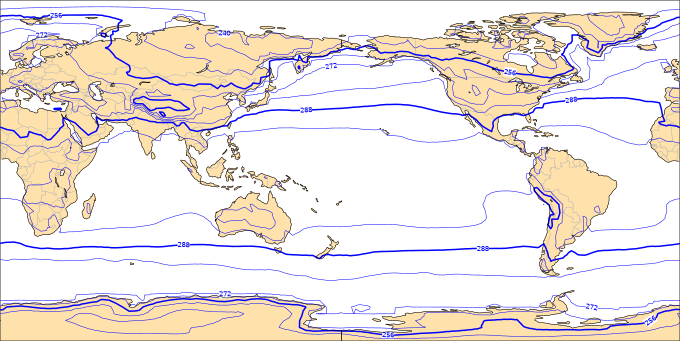

In [15]:
mean2 = ds.mean(dim="forecast_time")
cml.plot_map(mean2.isel(step=20, realization=0))


In [16]:
#mean3 = ds.mean(dim="time")
#cml.plot_map(mean3.isel(forecast_time=20, realization=0))

## Version 0.1.6 : with coordinates (forecast_time, time)

In [17]:
version = '0.1.6'

Let us download netcdf file for total precipitation (tp) for one date :

In [18]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set", date=["20200102"], parameter='tp', version=version, format='netcdf')

This climetlab dataset can be used as a xarray.Dataset or as a pandas.DataFrame :

In [19]:
cmlds.to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, time: 47)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * time           (time) datetime64[ns] 2020-01-02 2020-01-03 ... 2020-02-17
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    tp             (realization, forecast_time, time, latitude, longitude) float32 ...

In [20]:
# cmlds.to_pandas() # TODO : implement to_pandas()

We can get the temperature parameter (2t) in a similar fashion. The "date" and "parameter" arguments also accept lists of values.

In [21]:
cml.load_dataset("s2s-ai-competition-reference-set", date="20200102", parameter='2t', version=version, format='netcdf').to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, time: 46)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * time           (time) datetime64[ns] 2020-01-03 2020-01-04 ... 2020-02-17
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    t2m            (realization, forecast_time, time, latitude, longitude) float32 ...

In [22]:
cml.load_dataset("s2s-ai-competition-reference-set", date="20200102", parameter=['2t','tp'], version=version, format='netcdf').to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, time: 47)
Coordinates:
  * time           (time) datetime64[ns] 2020-01-02 2020-01-03 ... 2020-02-17
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    t2m            (realization, forecast_time, time, latitude, longitude) float32 ...
    tp             (realization, forecast_time, time, latitude, longitude) float32 ...

In [23]:
cml.load_dataset("s2s-ai-competition-reference-set", date=["20200102", "20200109"], parameter=['2t','tp'], version=version, format='netcdf').to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 2, latitude: 121, longitude: 240, realization: 51, time: 54)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 2020-01-09
  * time           (time) datetime64[ns] 2020-01-02 2020-01-03 ... 2020-02-24
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    t2m            (realization, forecast_time, time, latitude, longitude) float32 ...
    tp             (realization, forecast_time, time, latitude, longitude) float32 ...

In [24]:
# TODO
#from datetime import datetime
#cml.load_dataset("s2s-ai-competition-reference-set", date=[datetime(2020,1,2), "2020-01-09"], parameter=['2t','tp'], version=version, format='netcdf').to_xarray()

In [25]:
# TODO
#import pandas as pd
#cml.load_dataset("s2s-ai-competition-reference-set", date=pd.date_range(start="2020-01-02", end="2020-01-31", freq="w-thu"), parameter='2t', version=version, format='netcdf').to_xarray()

Hindcast data is **not** available by adding the appropriate parameter : hindcast = True

In [26]:
#ds = cml.load_dataset("s2s-ai-competition-reference-set", hindcast=True, date="20200102", parameter=['2t','tp'], version=version, format='netcdf').to_xarray()

### Computing average and plotting

In [ ]:
ds = cml.load_dataset("s2s-ai-competition-reference-set", date=["20200102", "20200109"], parameter=['2t','tp'], version=version, format='netcdf').to_xarray()
ds

In [ ]:
#mean1 = ds.mean(dim="step")
#cml.plot_map(mean1.isel(forecast_time=0, realization=0))

In [ ]:
mean2 = ds.mean(dim="forecast_time")
cml.plot_map(mean2.isel(time=20, realization=0))

In [ ]:
mean3 = ds.mean(dim="time")
cml.plot_map(mean3.isel(forecast_time=1, realization=0))

# Read Grib data

In [ ]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set", date=["20200102"], parameter='2t', version='1.0.0', format='grib')
cmlds

In [ ]:
ds = cmlds.to_xarray()
ds

# other

In [4]:
## TODO ? Grib files have been dowloaded. Iterate through them with :
#for filename in cmlds.files:
#    print(filename)

In [5]:
version = '0.1.7'
rt = cml.load_dataset("s2s-ai-competition-reference-set", date=["20200102"], parameter='tp', version=version, format='netcdf').to_xarray()
hc = cml.load_dataset("s2s-ai-competition-reference-set", date=["20200102"], hindcast=True, parameter='tp', version=version, format='netcdf').to_xarray()

By downloading data from this dataset, you agree to the their terms: Attribution 4.0 International(CC BY 4.0). If you do not agree with such terms, do not download the data. For more information, please visit https://www.ecmwf.int/en/terms-use and https://apps.ecmwf.int/datasets/data/s2s/licence/.


In [6]:
rt = rt.sel(latitude=slice(20,-20), longitude=slice(-20,20))
hc = hc.sel(latitude=slice(20,-20), longitude=slice(-20,20))

In [7]:
#hc = hc.isel(forecast_time=[0,1,2])

In [8]:
rt

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 27, longitude: 14, realization: 51, step: 47)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * latitude       (latitude) float64 19.5 18.0 16.5 15.0 ... -16.5 -18.0 -19.5
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 15.0 16.5 18.0 19.5
Data variables:
    time           (forecast_time, step) datetime64[ns] ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

In [9]:
hc

<xarray.Dataset>
Dimensions:        (forecast_time: 20, latitude: 27, longitude: 14, realization: 11, step: 47)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-01-02
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * latitude       (latitude) float64 19.5 18.0 16.5 15.0 ... -16.5 -18.0 -19.5
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 15.0 16.5 18.0 19.5
Data variables:
    time           (forecast_time, step) datetime64[ns] ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

In [10]:
rt.forecast_time.values, hc.forecast_time.values

(array(['2020-01-02T00:00:00.000000000'], dtype='datetime64[ns]'),
 array(['2000-01-02T00:00:00.000000000', '2001-01-02T00:00:00.000000000',
        '2002-01-02T00:00:00.000000000', '2003-01-02T00:00:00.000000000',
        '2004-01-02T00:00:00.000000000', '2005-01-02T00:00:00.000000000',
        '2006-01-02T00:00:00.000000000', '2007-01-02T00:00:00.000000000',
        '2008-01-02T00:00:00.000000000', '2009-01-02T00:00:00.000000000',
        '2010-01-02T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
        '2012-01-02T00:00:00.000000000', '2013-01-02T00:00:00.000000000',
        '2014-01-02T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
        '2016-01-02T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
        '2018-01-02T00:00:00.000000000', '2019-01-02T00:00:00.000000000'],
       dtype='datetime64[ns]'))

In [11]:
import xarray as xr

In [12]:
ds = xr.merge([hc,rt])
ds

<xarray.Dataset>
Dimensions:        (forecast_time: 21, latitude: 27, longitude: 14, realization: 51, step: 47)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2020-01-02
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * latitude       (latitude) float64 19.5 18.0 16.5 15.0 ... -16.5 -18.0 -19.5
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 15.0 16.5 18.0 19.5
Data variables:
    time           (forecast_time, step) datetime64[ns] 2000-01-02 ... 2020-0...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

In [13]:
#cmlds = cml.load_dataset("s2s-ai-competition-training-set",dataset='reference-set', date=["20200102"], parameter='tp', version=version, format='netcdf')

In [15]:
rt #.to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 27, longitude: 14, realization: 51, step: 47)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * latitude       (latitude) float64 19.5 18.0 16.5 15.0 ... -16.5 -18.0 -19.5
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 15.0 16.5 18.0 19.5
Data variables:
    time           (forecast_time, step) datetime64[ns] 2020-01-02 ... 2020-0...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

In [19]:
cml.load_dataset("s2s-ai-competition-reference-set", date=["20200102", "20200109"], parameter=['tp', '2t'], version=version, format='grib').to_xarray()

/home/mafp/.local/lib/python3.8/site-packages/dask/array/core.py:4241: PerformanceWarning: Increasing number of chunks by factor of 47
  result = blockwise(
/home/mafp/.local/lib/python3.8/site-packages/dask/array/core.py:4241: PerformanceWarning: Increasing number of chunks by factor of 47
  result = blockwise(
/home/mafp/.local/lib/python3.8/site-packages/dask/array/core.py:4241: PerformanceWarning: Increasing number of chunks by factor of 46
  result = blockwise(
/home/mafp/.local/lib/python3.8/site-packages/dask/array/core.py:4241: PerformanceWarning: Increasing number of chunks by factor of 46
  result = blockwise(


<xarray.Dataset>
Dimensions:        (forecast_time: 2, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 2020-01-09
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    time           (forecast_time, step) datetime64[ns] dask.array<chunksize=(2, 1), meta=np.ndarray>
Data variables:
    tp             (realization, forecast_time, step, latitude, longitude) float32 dask.array<chunksize=(1, 2, 1, 121, 240), meta=np.ndarray>
    t2m            (realization, forecast_time, step, latitude, longitude) float32 dask.array<chunksize=(1, 2, 2, 121, 240), meta=np.ndarray>

In [17]:
cml.load_dataset("s2s-ai-competition-reference-set", date=["20200102"], parameter='tp', version=version, format='netcdf').to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...